In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# make the original data
series = np.sin((0.1 * np.arange(400)) ** 2)

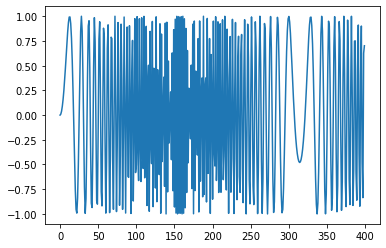

In [5]:
# plot the data
plt.plot(series)

In [6]:
## build the dataset
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print(f"X.shape {X.shape}, Y.shape {Y.shape}")

X.shape (390, 10), Y.shape (390,)


In [22]:
# Try AutoRegressive RNN model
i = Input(shape=(T, ))
# x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(i)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.01))

# Train the RNN
r = model.fit(X[:-N//2], Y[:N//2], epochs=80, 
              validation_data=(X[-N//2:], Y[N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 1s 3ms/sample - loss: 1.9887 - val_loss: 0.8028
Epoch 2/80
195/195 [==============================] - 0s 506us/sample - loss: 1.6441 - val_loss: 0.7227
Epoch 3/80
195/195 [==============================] - 0s 435us/sample - loss: 1.3741 - val_loss: 0.6716
Epoch 4/80
195/195 [==============================] - 0s 395us/sample - loss: 1.1377 - val_loss: 0.6313
Epoch 5/80
195/195 [==============================] - 0s 487us/sample - loss: 0.9753 - val_loss: 0.6011
Epoch 6/80
195/195 [==============================] - 0s 313us/sample - loss: 0.8309 - val_loss: 0.5722
Epoch 7/80
195/195 [==============================] - 0s 468us/sample - loss: 0.7292 - val_loss: 0.5561
Epoch 8/80
195/195 [==============================] - 0s 398us/sample - loss: 0.6572 - val_loss: 0.5494
Epoch 9/80
195/195 [==============================] - 0s 410us/sample - loss: 0.6037 - val_loss: 0.5467
Epoch 10/80
195/195 

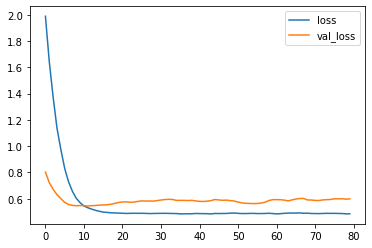

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


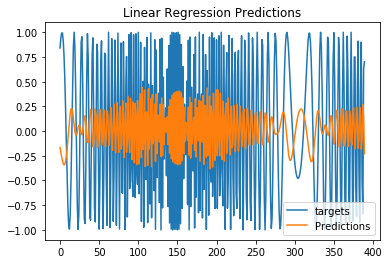

In [24]:
# ONE-step forecast using true targets
# Note: even the one-step forecast fails badly

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='Predictions')
plt.title('Linear Regression Predictions')
plt.legend()

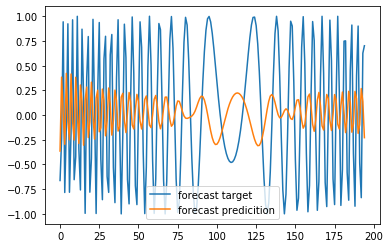

In [25]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N // 2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
    i += 1
    
    # update the predicitions list
    validation_predictions.append(p)

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predicition')
plt.legend()

In [26]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

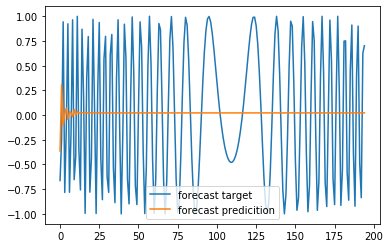

In [27]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predicition')
plt.legend()

In [34]:
### Try RNN/ LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.05))

# Train the RNN
r = model.fit(X[:-N//2], Y[:-N//2], 
              batch_size=32, 
              epochs=200, 
              validation_data=(X[-N//2:], Y[-N//2:]))

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 3s 18ms/sample - loss: 0.5519 - val_loss: 0.6417
Epoch 2/200
195/195 [==============================] - 0s 876us/sample - loss: 0.5437 - val_loss: 0.5645
Epoch 3/200
195/195 [==============================] - 0s 846us/sample - loss: 0.5097 - val_loss: 0.5331
Epoch 4/200
195/195 [==============================] - 0s 777us/sample - loss: 0.4934 - val_loss: 0.5704
Epoch 5/200
195/195 [==============================] - 0s 717us/sample - loss: 0.4754 - val_loss: 0.5942
Epoch 6/200
195/195 [==============================] - 0s 665us/sample - loss: 0.4596 - val_loss: 0.5054
Epoch 7/200
195/195 [==============================] - 0s 749us/sample - loss: 0.3713 - val_loss: 0.5197
Epoch 8/200
195/195 [==============================] - 0s 725us/sample - loss: 0.2716 - val_loss: 0.3910
Epoch 9/200
195/195 [==============================] - 0s 677us/sample - loss: 0.1671 - val_loss: 0.3839
Epoch 10/2

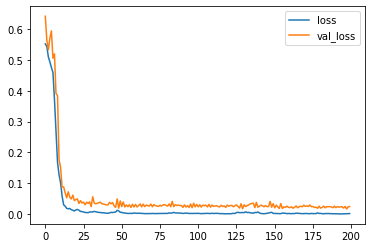

In [35]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


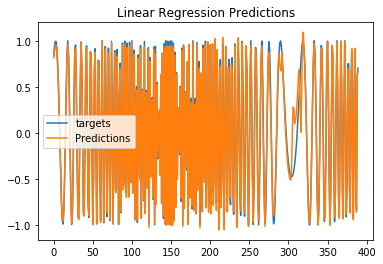

In [36]:
# ONE-step forecast using true targets
# Note: even the one-step forecast fails badly

outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='Predictions')
plt.title('Linear Regression Predictions')
plt.legend()

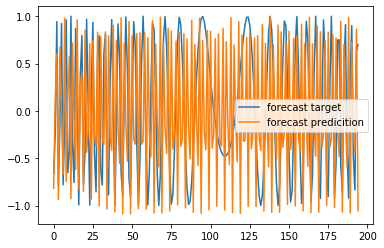

In [37]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predicition')
plt.legend()